% md
# Noga 400 free

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("data/noga.csv")
display(df)

,Type,Time
0,breakout,4.360
1,cycle,2.677
2,cycle,1.357
3,cycle,1.351
4,cycle,1.505
...,...,...
153,cycle,1.273
154,cycle,1.513
155,cycle,1.518
156,cycle,1.326


In [4]:
display(df[df["Type"] == "breakout"])

,Type,Time
0,breakout,4.360
6,breakout,5.451
15,breakout,4.307
24,breakout,5.202
33,breakout,4.058
42,breakout,5.256
52,breakout,3.716
62,breakout,3.808
72,breakout,4.386
83,breakout,4.039


Index(['Type', 'Time', 'frequency', 'frequency_w'], dtype='object')


/var/folders/nt/6j2x2cxx6n11n9_fw_x899l80000gn/T/ipykernel_79933/1604977313.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frequency["frequency"] = round(60 / df["Time"])
/var/folders/nt/6j2x2cxx6n11n9_fw_x899l80000gn/T/ipykernel_79933/1604977313.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frequency["frequency_w"] = df_frequency["frequency"] \
/var/folders/nt/6j2x2cxx6n11n9_fw_x899l80000gn/T/ipykernel_79933/1604977313.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy 

<Axes: xlabel='Time (cum)', ylabel='frequency_w'>

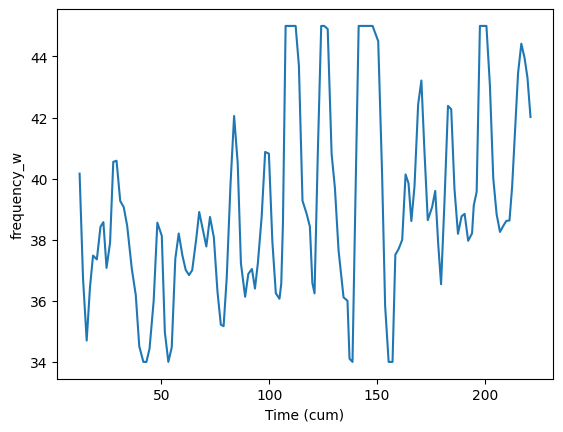

In [24]:
import seaborn as sns


def __filter_outliers(df: pd.DataFrame) -> pd.DataFrame:
    # TODO: calculate the th by std diviation.
    df["frequency_w"] = df["frequency_w"].clip(lower=34, upper=45)
    return df


def __with_time(df: pd.DataFrame) -> pd.DataFrame:
    print(df.columns)
    df["Time (cum)"] = df["Time"].cumsum()
    return df


df_frequency = df[df["Type"] == "cycle"]
df_frequency["frequency"] = round(60 / df["Time"])
df_frequency["frequency_w"] = df_frequency["frequency"] \
    .rolling(window=7, win_type="gaussian") \
    .mean(std=1.0)
df_display = __with_time(__filter_outliers(df_frequency))

sns.lineplot(data=df_display, x="Time (cum)", y="frequency_w")